/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


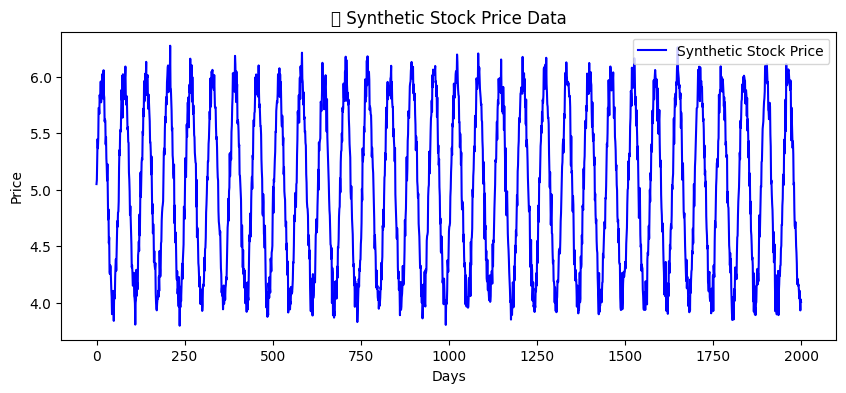

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0522 - val_loss: 0.0025
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 10/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0021 - val_loss: 0.0022
Epoch 11/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 12/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


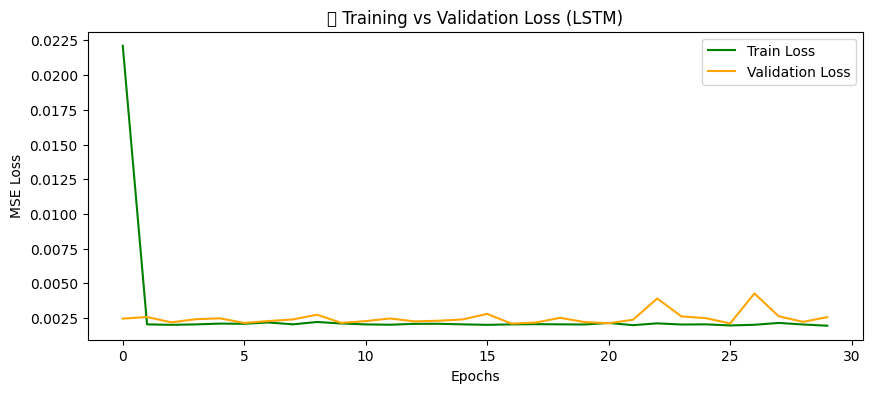

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


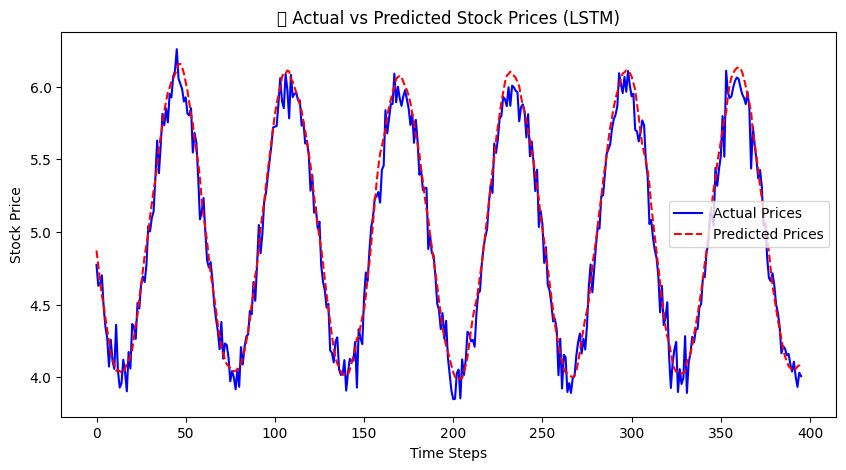

✅ Mean Squared Error: 0.0133


In [1]:
# -----------------------------------------------------------
# 📈 LSTM (Recurrent Neural Network) for Stock Price Prediction
# -----------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# ---------------------------------
# 1️⃣ Create synthetic stock-like data
# ---------------------------------
np.random.seed(42)
time = np.arange(0, 200, 0.1)
stock_price = np.sin(time) + np.random.normal(0, 0.1, len(time)) + 5
df = pd.DataFrame(stock_price, columns=['Price'])

# Plot sample stock prices
plt.figure(figsize=(10,4))
plt.plot(df['Price'], label='Synthetic Stock Price', color='blue')
plt.title('📊 Synthetic Stock Price Data')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

# ---------------------------------
# 2️⃣ Data preprocessing
# ---------------------------------
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

# Create sequences for LSTM
def create_sequences(data, step=20):
    X, y = [], []
    for i in range(len(data)-step):
        X.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# ---------------------------------
# 3️⃣ Build LSTM Model
# ---------------------------------
model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

# ---------------------------------
# 4️⃣ Predict on test data
# ---------------------------------
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# ---------------------------------
# 5️⃣ Plot Training Loss
# ---------------------------------
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("📉 Training vs Validation Loss (LSTM)")
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

# ---------------------------------
# 6️⃣ Plot Actual vs Predicted Prices
# ---------------------------------
plt.figure(figsize=(10,5))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(y_pred_inv, label='Predicted Prices', color='red', linestyle='--')
plt.title("📈 Actual vs Predicted Stock Prices (LSTM)")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# ---------------------------------
# 7️⃣ Model Evaluation
# ---------------------------------
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"✅ Mean Squared Error: {mse:.4f}")
